<a href="https://colab.research.google.com/github/abidshafee/DataScienceYouTubeTutorials/blob/master/KNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

From my personal observation, the accuracy of the KNN Model depends on the overlapping of data. The more the data overlap on each other, the less the accurate the KNN model will able to perform. We can find data overlapping from PCA scatter plot or seaborn pair plot. For densely overlapped data point accuracy increased significantly by increasing the value *n_neighbor*.

In [1291]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from matplotlib import style
style.use('ggplot')

In [1292]:
df = pd.read_csv('Iris.csv', index_col=0)
df = df.sample(frac=1)  # embaralha o database

In [1293]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
55,6.5,2.8,4.6,1.5,Iris-versicolor
38,4.9,3.1,1.5,0.1,Iris-setosa
58,4.9,2.4,3.3,1.0,Iris-versicolor
44,5.0,3.5,1.6,0.6,Iris-setosa
91,5.5,2.6,4.4,1.2,Iris-versicolor


### Defining Input variables 'X', and targeted output 'y' 

## **Converting Categorical Species column to numeric values**
*Not that necessary for this case*

In [1294]:
from sklearn.preprocessing import LabelEncoder

In [1295]:
encodedOutput_Y = LabelEncoder()
df['Species'] = encodedOutput_Y.fit_transform(df.iloc[:,-1].values)

In [1296]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
18,5.1,3.5,1.4,0.3,0
64,6.1,2.9,4.7,1.4,1
54,5.5,2.3,4.0,1.3,1
119,7.7,2.6,6.9,2.3,2
8,5.0,3.4,1.5,0.2,0


0 -> Iris-setosa
1 -> Iris-versicolor
2 -> Iris-virginica

In [1297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 55 to 8
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 7.0 KB


## Distribution of Data in the dataset
How data is distributed in the dataset. Here are more pairplot options.
[sns.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

**hue** has been set to Species without converting numerical values

As we can see in the distribution that the data in the dataset doesn't have much Overlaping except for few. So we can easily apply KNN for this dataset expection much better output.

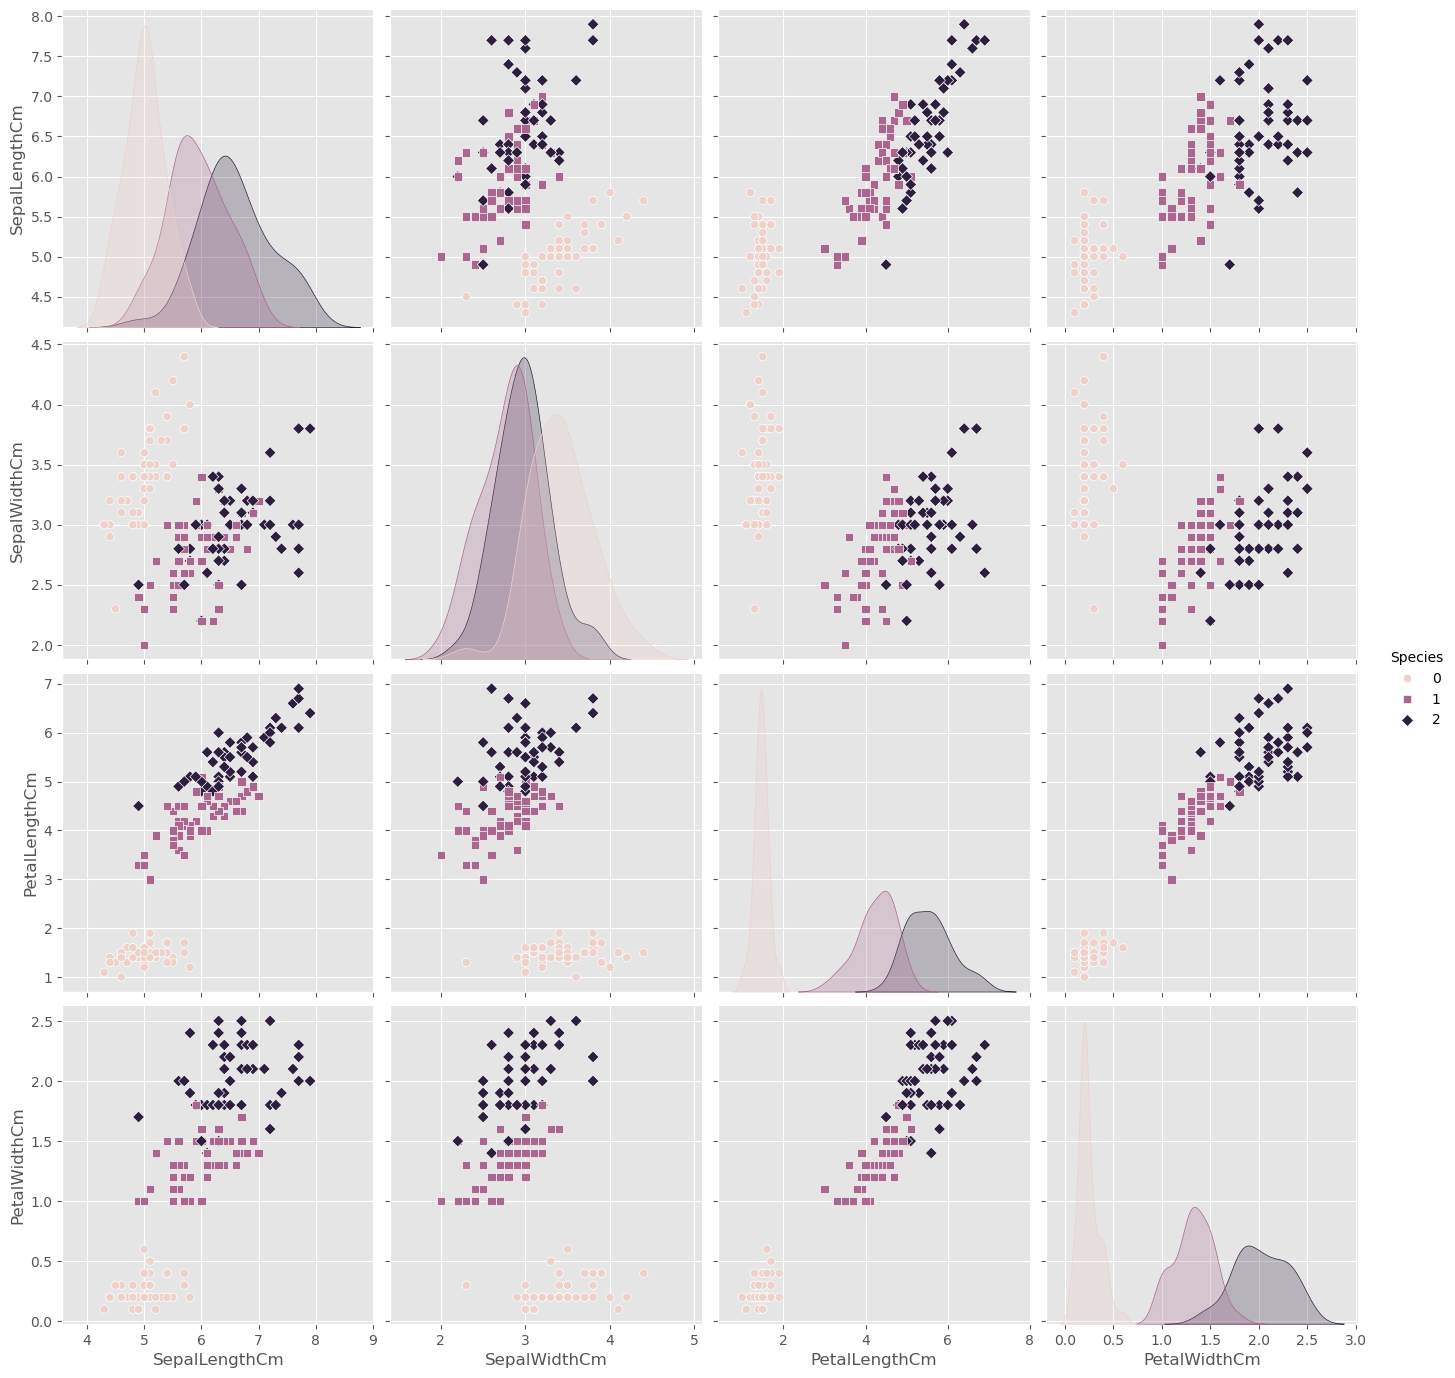

In [1298]:
sns.pairplot(df, hue='Species',  markers=["o", "s", "D"], height=3.5) # hue=y when y datatype is boolean

### Slicing Input variables and targeted output

In [1299]:
numeric_df = df.iloc[:,2:4]

# drop the categorical Species column
# ty=df.drop('Species',axis=1)
# Targeted Output as pandas.Series
# y = df[[df.columns[-1]]]
y = df[df.columns[-1]]

In [1300]:
numeric_df

,PetalLengthCm,PetalWidthCm
Id,,
55,4.6,1.5
38,1.5,0.1
58,3.3,1.0
44,1.6,0.6
91,4.4,1.2
...,...,...
18,1.4,0.3
64,4.7,1.4
54,4.0,1.3


### Convering y to 1D numpy array
because knn expect targeted output in this shape

In [1301]:
y = y.values

In [1302]:
y

array([1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 2, 2, 1, 2, 1, 0, 2, 0, 0, 1, 0, 0,
       2, 1, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 0, 0, 2, 2, 0, 1, 0, 1, 1, 0,
       2, 1, 1, 0, 1, 1, 0, 0, 2, 2, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 2, 1,
       0, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2, 0, 2, 1, 0,
       0, 0, 0, 1, 2, 2, 2, 0, 0, 1, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0, 1, 0,
       0, 0, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 2, 1, 0, 1, 0, 2, 0,
       1, 0, 1, 2, 1, 1, 1, 2, 0, 0, 1, 1, 0, 0, 1, 1, 2, 0])

### Scaling data for centering the dataset to origin 

In [1303]:
from sklearn.preprocessing import StandardScaler

In [1304]:
scaler = StandardScaler()
scaler.fit(numeric_df)

StandardScaler()

In [1305]:
scaled_data = scaler.transform(numeric_df)

In [1306]:
scaled_data

array([[ 4.78430123e-01,  3.96171883e-01],
       [-1.28440670e+00, -1.44444970e+00],
       [-2.60824029e-01, -2.61192967e-01],
       [-1.22754100e+00, -7.87084847e-01],
       [ 3.64698715e-01,  1.75297293e-03],
       [-1.22754100e+00, -1.31297673e+00],
       [-1.34127240e+00, -1.31297673e+00],
       [ 8.76490051e-01,  9.22063763e-01],
       [ 1.21768427e+00,  1.18500970e+00],
       [ 5.35295827e-01,  2.64698913e-01],
       [ 1.04708716e+00,  1.18500970e+00],
       [ 1.04708716e+00,  1.31648267e+00],
       [ 4.21564419e-01,  3.96171883e-01],
       [ 7.62758643e-01,  3.96171883e-01],
       [ 3.07833011e-01,  1.33225943e-01],
       [-1.45500381e+00, -1.31297673e+00],
       [ 5.92161531e-01,  7.90590793e-01],
       [-1.05694388e+00, -1.05003079e+00],
       [-1.39813811e+00, -1.31297673e+00],
       [ 1.37235899e-01,  1.33225943e-01],
       [-1.17067529e+00, -1.05003079e+00],
       [-1.34127240e+00, -1.31297673e+00],
       [ 7.62758643e-01,  9.22063763e-01],
       [ 7.

### Converting scaled data to a dataframe

In [1307]:
scaled_df = pd.DataFrame(scaled_data, columns=df.columns[2:-1])

In [1308]:
X = scaled_df
X

,PetalLengthCm,PetalWidthCm
0,0.478430,0.396172
1,-1.284407,-1.444450
2,-0.260824,-0.261193
3,-1.227541,-0.787085
4,0.364699,0.001753
...,...,...
145,-1.341272,-1.181504
146,0.535296,0.264699
147,0.137236,0.133226
148,1.786341,1.447956


## Test Train Split

In [1309]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [1310]:
print('Size of Train Data >> ' + str(len(X_train)))
print('Size of Test  >> ' + str(len(X_test)))
print('Size of y Train >> ' + str(len(y_train)))
print('Size of y Test >> ' + str(len(y_test)))

Size of Train Data >> 120
Size of Test  >> 30
Size of y Train >> 120
Size of y Test >> 30


# **Using KNN Classifier**

In [1311]:
knn = KNeighborsClassifier(n_neighbors=13)

In [1312]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [1313]:
prediction = knn.predict(X_test)

In [1314]:
prediction

array([1, 2, 1, 2, 0, 0, 1, 2, 0, 1, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 2, 1,
       1, 1, 0, 2, 2, 2, 2, 0])

## Accuracy of our Model

In [1315]:
from sklearn.metrics import accuracy_score

In [1316]:
knn_accuracy = round((accuracy_score(y_test, prediction) * 100), 2)

In [1317]:
print(str(knn_accuracy) + '%')

93.33%


## Testing Accurecy of KNN Model using `confusion_matrix`, and `classification_report`

In [1318]:
from sklearn.metrics import classification_report, confusion_matrix

In [1319]:
conf_matrix = confusion_matrix(y_test, prediction)
print(conf_matrix)
print(conf_matrix.shape)

[[ 9  0  0]
 [ 0  8  1]
 [ 0  1 11]]
(3, 3)


`Each row in a confusion matrix represents an actual class, while each column represents a predicted class.`

**From the confusion matrix**
 - For first-col first-row we can say that we have prediced 9 values correctly category-0, and no false prediction.
 - 2nd-col 2nd-row 10 values correctly predicted category-1 comparing to y_test, and 2 falsely predicted caregory-2. 
 - $3^{rd}$-col, $3^{rd}$-row our model has predicted 9 values correctly category-2, and and no false prediction.

### Plotting Confusion Matrix
**Each row in a confusion matrix represents an actual class, while each column represents a predicted class.**

<AxesSubplot: >

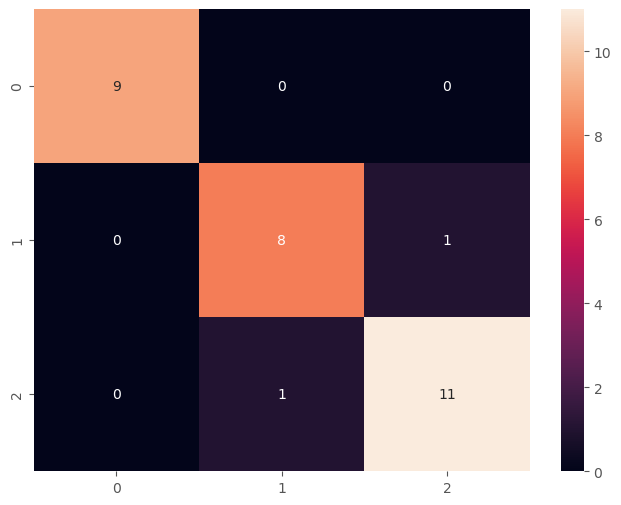

In [1320]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True)

The confusion matrix gives us a lot of information, but sometimes we may need to prefer a more concise metric

Without converting categorical variables to numerical values.

In [1321]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.89      0.89      0.89         9
           2       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



 - **precision** of the classifier ratio of positive prediction.
 $precision = \frac{TP
 }{TP + FP}$
 - **Recall**, also called sensitivity or true positive rate (TPR): the ratio of positive instances that are correctly detected by the classifier, almost Similar to precsion. $recall = \frac{TP
 }{TP + FN}$
 - classifier will only get a high **F1-score** if both recall and precision are high.

### Selecting best K value or n_neighbors
using cross validation

In [1322]:
from sklearn.model_selection import cross_val_score

In [1323]:
accuracy =[]
for num in range(1, 120):
  if num % 2 == 0:
    continue
  knn = KNeighborsClassifier(n_neighbors=num)
  acc= cross_val_score(knn, X, y, cv=20)
  accuracy.append(acc.mean()*100) #1-acc.mean()

In [1324]:
accuracy

i = 0
for k in range(1, 120):
    if k % 2 == 0:
        continue
    print(f"Para k = {k}, (Taxa: {accuracy[i]}%)")
    i += 1

Para k = 1, (Taxa: 97.32142857142858%)
Para k = 2, (Taxa: 96.69642857142857%)
Para k = 4, (Taxa: 96.07142857142857%)
Para k = 5, (Taxa: 96.07142857142857%)
Para k = 7, (Taxa: 96.78571428571429%)
Para k = 8, (Taxa: 96.07142857142857%)
Para k = 10, (Taxa: 96.07142857142857%)
Para k = 11, (Taxa: 96.07142857142857%)
Para k = 13, (Taxa: 96.07142857142857%)
Para k = 14, (Taxa: 96.07142857142857%)
Para k = 16, (Taxa: 96.07142857142857%)
Para k = 17, (Taxa: 96.07142857142857%)
Para k = 19, (Taxa: 96.07142857142857%)
Para k = 20, (Taxa: 96.07142857142857%)
Para k = 22, (Taxa: 96.07142857142857%)
Para k = 23, (Taxa: 96.07142857142857%)
Para k = 25, (Taxa: 96.07142857142857%)
Para k = 26, (Taxa: 96.69642857142857%)
Para k = 28, (Taxa: 96.07142857142857%)
Para k = 29, (Taxa: 96.07142857142857%)
Para k = 31, (Taxa: 96.07142857142857%)
Para k = 32, (Taxa: 96.07142857142857%)
Para k = 34, (Taxa: 96.69642857142857%)
Para k = 35, (Taxa: 96.07142857142857%)
Para k = 37, (Taxa: 96.69642857142857%)
Para k

Plotting the accurecy of the model prediction for the value of n_neighbor from 1 to 50.

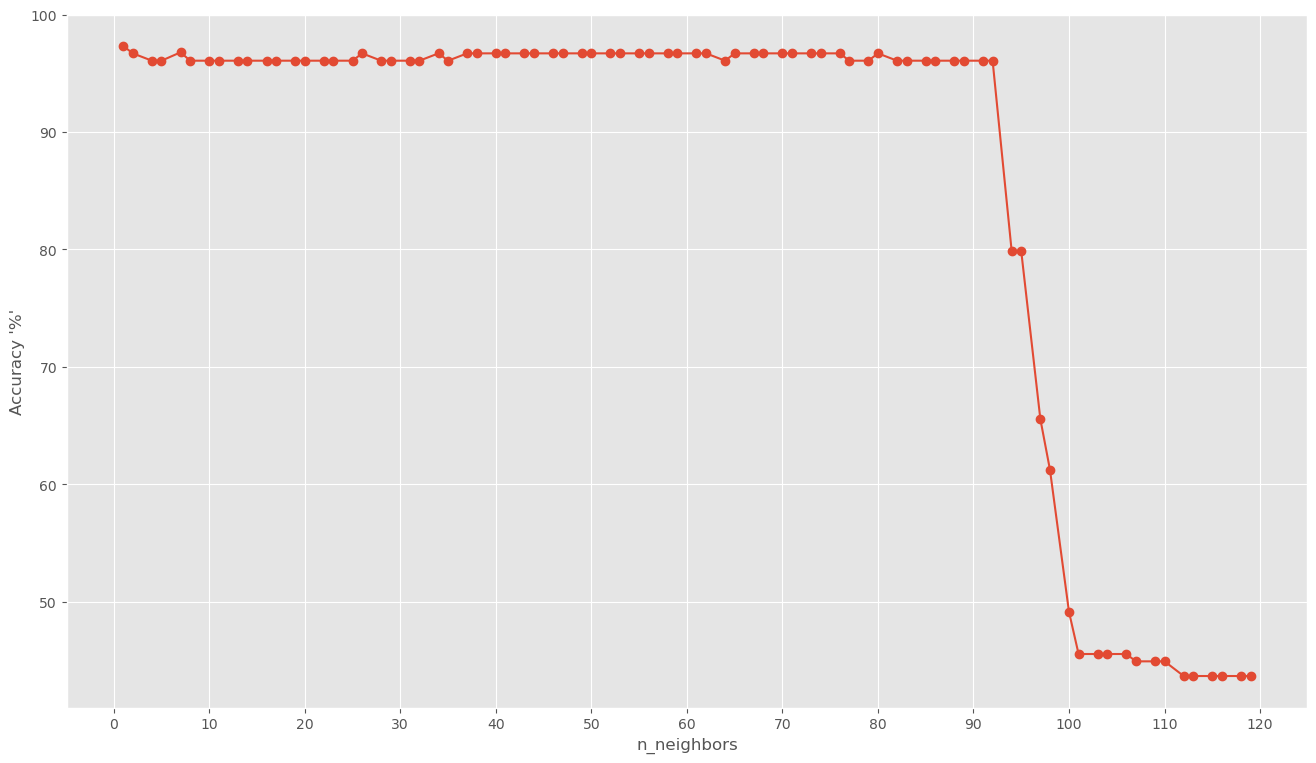

In [1325]:
plt.figure(figsize=(16, 9))
plt.plot([i for i in range(1, 120) if i % 2 != 0], accuracy, marker='o')
plt.ylabel("Accuracy '%'")
plt.xlabel("n_neighbors")
plt.xticks(np.arange(0, 121, step=10))
plt.show()

# **k fold cross validation**

Just like the `cross_val_score()` function, `cross_val_predict()` performs **K-fold** cross-validation, but instead of returning the evaluation scores, *it returns the predictions made on each test fold*. This means that we get a clean prediction for each
instance in the training set.

In [1326]:
from sklearn.model_selection import cross_val_predict

In [1327]:
kf_accurecy = {i: 0 for i in k_n}
for i in k_n:
  knn = KNeighborsClassifier(n_neighbors=i)
  pred = cross_val_predict(knn, X, y, cv=2)
  kf_accurecy[i] = round((pred.mean()*100), 2)

ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 77, n_samples_fit = 75, n_samples = 75

In [773]:
kf_accurecy

[101.33,
 96.67,
 100.0,
 98.67,
 98.67,
 98.67,
 99.33,
 98.67,
 98.67,
 98.67,
 99.33,
 99.33,
 99.33,
 99.33,
 99.33,
 98.67,
 99.33,
 97.33,
 98.0,
 98.0,
 98.67,
 98.0,
 98.0,
 97.33,
 97.33,
 97.33,
 97.33,
 97.33,
 98.0,
 97.33,
 97.33,
 97.33,
 98.0,
 96.0,
 96.0,
 96.0,
 96.0,
 96.0,
 96.67,
 95.33,
 96.67,
 96.0,
 96.67,
 96.67,
 97.33,
 97.33,
 97.33,
 95.33,
 97.33]

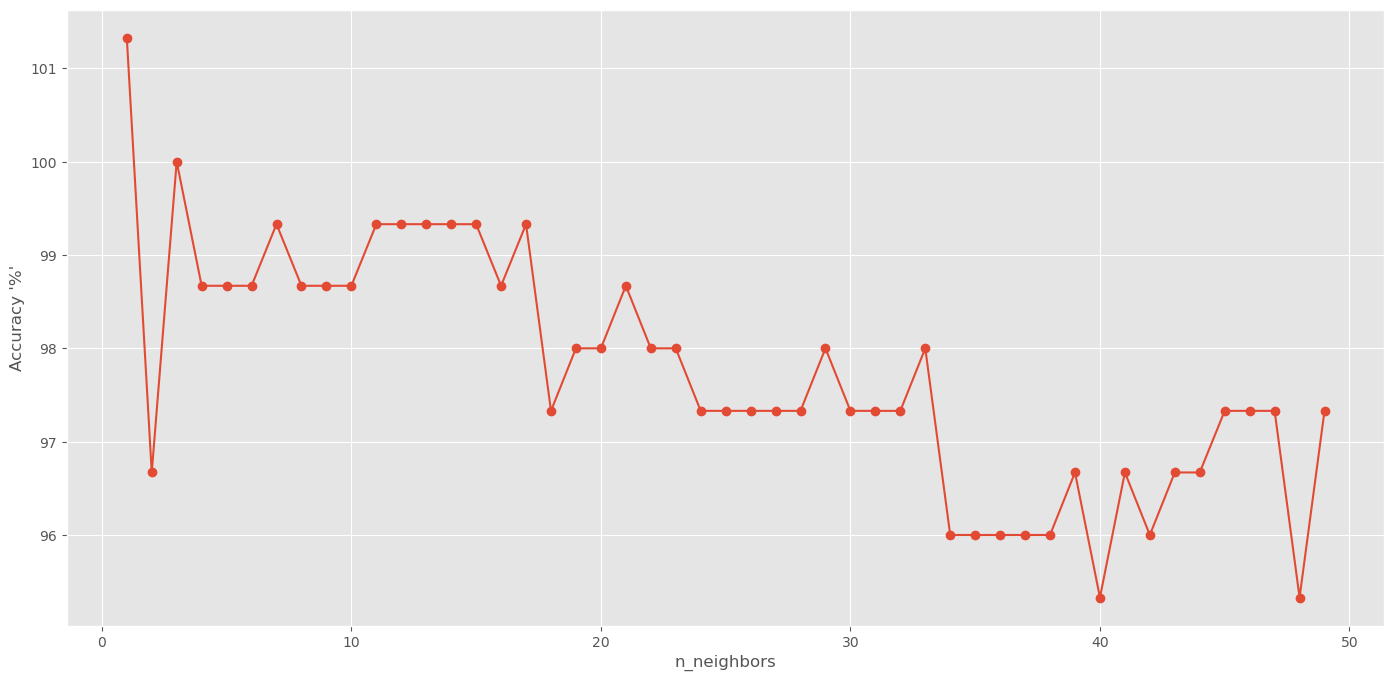

In [774]:
plt.figure(figsize=(17, 8))
plt.plot(range(1,120), kf_accurecy, marker='o')
plt.ylabel("Accuracy '%'")
plt.xlabel("n_neighbors")
plt.show()